In [1]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 4.8 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanSquaredError
from sktime.utils.plotting import plot_series

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/monthly-milk-production-pounds-p.csv",index_col=0)
idx = pd.to_datetime( df.index ).to_period("M")
df.index = idx

In [4]:
y_train, y_test = temporal_train_test_split(df,test_size=12)
fh = np.arange(1, len(y_test) + 1) 
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [5]:
regressor = RandomForestRegressor(random_state=2022)

In [9]:
forecaster = make_reduction(regressor, window_length=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
rmse = MeanSquaredError(square_root=True)
print(rmse(y_test, y_pred))

16.14421026250585


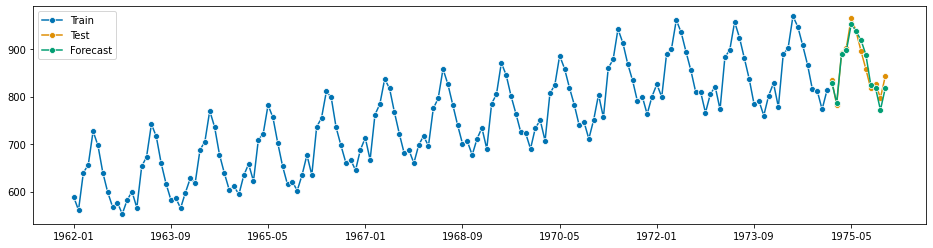

In [10]:
plot_series(y_train,y_test,y_pred , labels=['Train','Test','Forecast'])
plt.show()

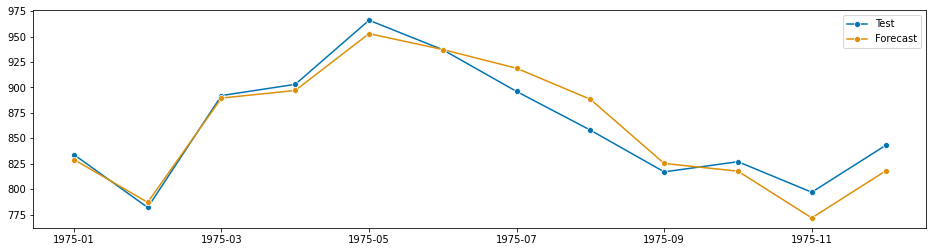

In [11]:
plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()

## **Basic Grid Search CV**

In [12]:
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import ForecastingGridSearchCV,SlidingWindowSplitter
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")
param_grid = {"window_length": [7,10, 12, 15]}


We fit the forecaster on an initial window which is 80% of the historical data then use temporal sliding window cross-validation to find the optimal hyper-parameters


In [13]:
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.8), window_length=20)
gscv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=param_grid)
gscv.fit(y_train)

ForecastingGridSearchCV(cv=SlidingWindowSplitter(initial_window=124,
                                                 window_length=20),
                        forecaster=RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(random_state=2022)),
                        param_grid={'window_length': [7, 10, 12, 15]})

In [14]:
print(gscv.best_params_)
print(gscv.best_score_)

{'window_length': 7}
0.026337019110242797


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a28d71a30>)

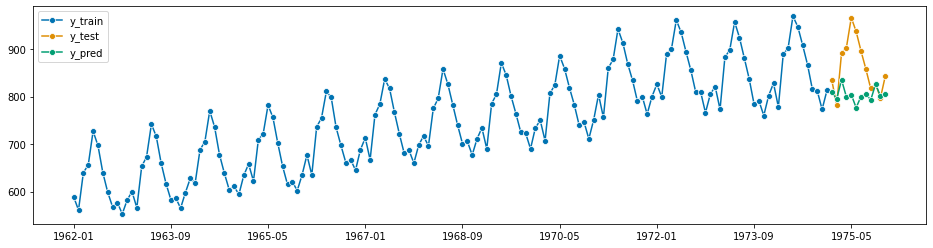

In [15]:
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])


In [16]:
print(rmse(y_test, y_pred))

82.0380989743993


### **Composite Grid Search C**V

In [ ]:
forecaster.get_params()

In [18]:
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")
param_grid = {"window_length": [7, 10, 12, 15],
              'estimator__max_features':['auto', 'sqrt', 'log2']}
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.8), window_length=20)
gscv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=param_grid)

gscv.fit(y_train)

ForecastingGridSearchCV(cv=SlidingWindowSplitter(initial_window=124,
                                                 window_length=20),
                        forecaster=RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(random_state=2022)),
                        param_grid={'estimator__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                    'window_length': [7, 10, 12, 15]})

In [19]:
print(gscv.best_params_)
print(gscv.best_score_)

{'estimator__max_features': 'auto', 'window_length': 7}
0.026337019110242797


In [20]:
print(rmse(y_test, y_pred))

82.0380989743993


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a28d43be0>)

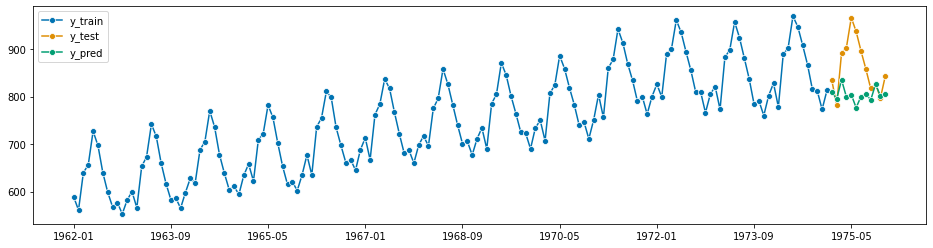

In [21]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])


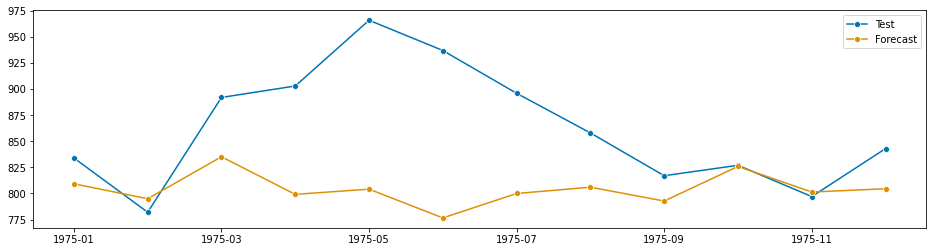

In [22]:
plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()